# Capstone

Program : PGPDSE-FT Gurgaon Jul19

Group Name: Group F

Domain: Retail Analytics

Data set : https://archive.ics.uci.edu/ml/datasets/Online+Shoppers+Purchasing+Intention+Dataset

Title : Online Shoppers Purchasing Intention

Problem Statement : Predict the purchasing intention of the visitor using aggregated pageview data track during the visit along with some session and user information


*******************
About data set
*******************
The dataset was formed so that each session would belong to a different user in a 1-year period to avoid any tendency to a specific campaign, special day, user profile, or period. Use the dataset to build a Machine Learning Model to predict whether the user visit has been finalized with a transaction.

The dataset consists of feature vectors belonging to 12,330 sessions. Of the 12,330 sessions in the dataset, 84.5% (10,422) were negative class samples that did not end with shopping, and the rest 15.5% (1908) were positive class samples ending with shopping.

In [1]:
# Libraries for EDA

import pandas as pd
import numpy as np
import pandas_profiling as pp
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import data set
os_df = pd.read_csv('online_shoppers_intention.csv')

In [3]:
os_df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [4]:
os_df.shape

(12330, 18)

In [5]:
pp.ProfileReport(os_df)

Number of variables,18
Number of observations,12330
Total Missing (%),0.0%
Total size in memory,1.5 MiB
Average record size in memory,130.0 B
Numeric,13
Categorical,2
Boolean,2
Date,0
Text (Unique),0
Rejected,1


In [6]:
# Find the diffrent datatypes available in datasource

columns_df=pd.DataFrame({'column_names':os_df.columns,'datatypes':os_df.dtypes},index=None)
x=columns_df.groupby(by=['datatypes']).count()
x.reset_index(inplace=True)
x.rename(columns={"column_names":"Number_of_columns"},inplace=True)
lst=[]
for data_type in x.datatypes:
    v=list(os_df.select_dtypes(include=data_type).columns)
    lst.append(v)
    x['Column_Names']=pd.Series(lst)
x

,datatypes,Number_of_columns,Column_Names
0,bool,2,"[Weekend, Revenue]"
1,int64,7,"[Administrative, Informational, ProductRelated..."
2,float64,7,"[Administrative_Duration, Informational_Durati..."
3,object,2,"[Month, VisitorType]"


In [7]:
#checking the NA values
os_df.isna().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [8]:
#checking the Null values in the dataset
os_df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

# Data set attribute information

*******************************************
Numerical features - 10
*******************************************

"Administrative", "Administrative Duration", "Informational", "Informational Duration", "Product Related" and "Product Related Duration" represent the number of different types of pages visited by the visitor and total time spent in each of these page types in seconds. The values of these features are derived from the URL information of the pages visited by the user and updated in real time when a user takes an action, e.g. moving from one page to another.

E.g. 

Administrative clicks can be - login, logout, password recovery, profile, email wish list
Informational clicks can be - ad popups, contactus, nearby stores
Product Related clicks can be - search, shopping cart


The "Bounce Rate", "Exit Rate" and "Page Value" features represent the metrics measured by "Google Analytics" for each page in the e-commerce site. These values can be stored in the system for all web pages of the e-commerce site in the developed system and updated automatically at regular intervals.

"Bounce Rate" - Value refers to the percentage of visitors who enter the site from that page and then leave ("bounce") without triggering any other requests to the analytics server during that session.

"Exit Rate" - Value is calculated as for all page views to the page, the percentage that were the last in the session.

"Page Value" - represents the average value for a web page that a user visited before completing an E-commerce transaction



The “Special Day” feature indicates the closeness of the site visiting time to the special days (e.g. Mother’s Day, Valentine's Day) in which the sessions are more likely to be finalized with transaction. The value of this attribute is determined by considering the dynamics of e-commerce such as the duration between the order date and delivery date. For example, for Valentina’s day, this value takes a nonzero value between February 2 and February 12, zero before and after this date unless it is close to another special day, and its maximum value of 1 on February 8.


*******************************************
Categorical features - 8
*******************************************

Operating Systems - Operating system of the visitor

Browser - Browser of the visitor 

Region - Geo from which session was started by visitor

Traffic Type - Source by which visitor has arrived at the website (e.g. banner, sms, direct etc.)

Visitor Type - New, returning and other

Weekend - date of visit is weekend or not

month - month value of visit date

Revenue - Target label indicating whether the visit was finalized with a transaction or not


The "Operating Systems", " Browser", " Traffic Type" and “Visitor Type” features represent the metrics measured by "Google Analytics" for each page in the e-commerce site. “Weekend” and “Month” features are derived by looking date of visit. They give information about whether the date of visit is at the end of the week or not and the moth of the visit respectively. “Revenue” feature indicates that whether the visit results in transaction finalization.

# Exploratory Data Analysis (EDA)

## Understanding Visitors behavior patterns

In [9]:
# Types of visitors

os_df['VisitorType'].value_counts()

Returning_Visitor    10551
New_Visitor           1694
Other                   85
Name: VisitorType, dtype: int64

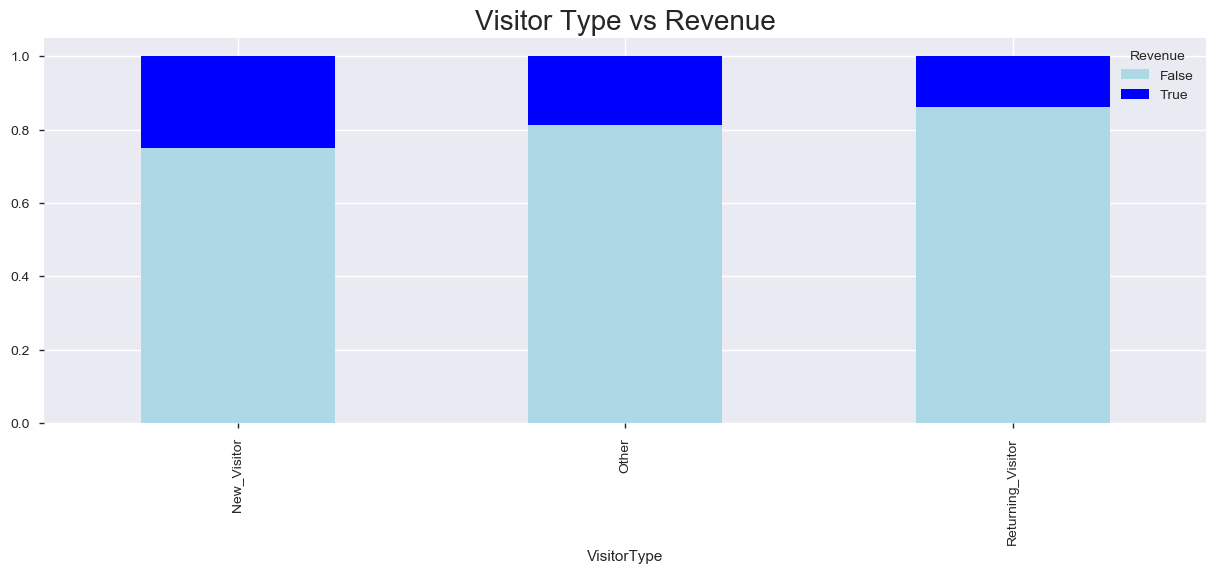

In [10]:
# Impact of visitor type on revenue

df = pd.crosstab(os_df['VisitorType'], os_df['Revenue'])
df.div(df.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (15, 5), color = ['lightblue', 'blue'])
plt.title('Visitor Type vs Revenue', fontsize = 20)
plt.show()

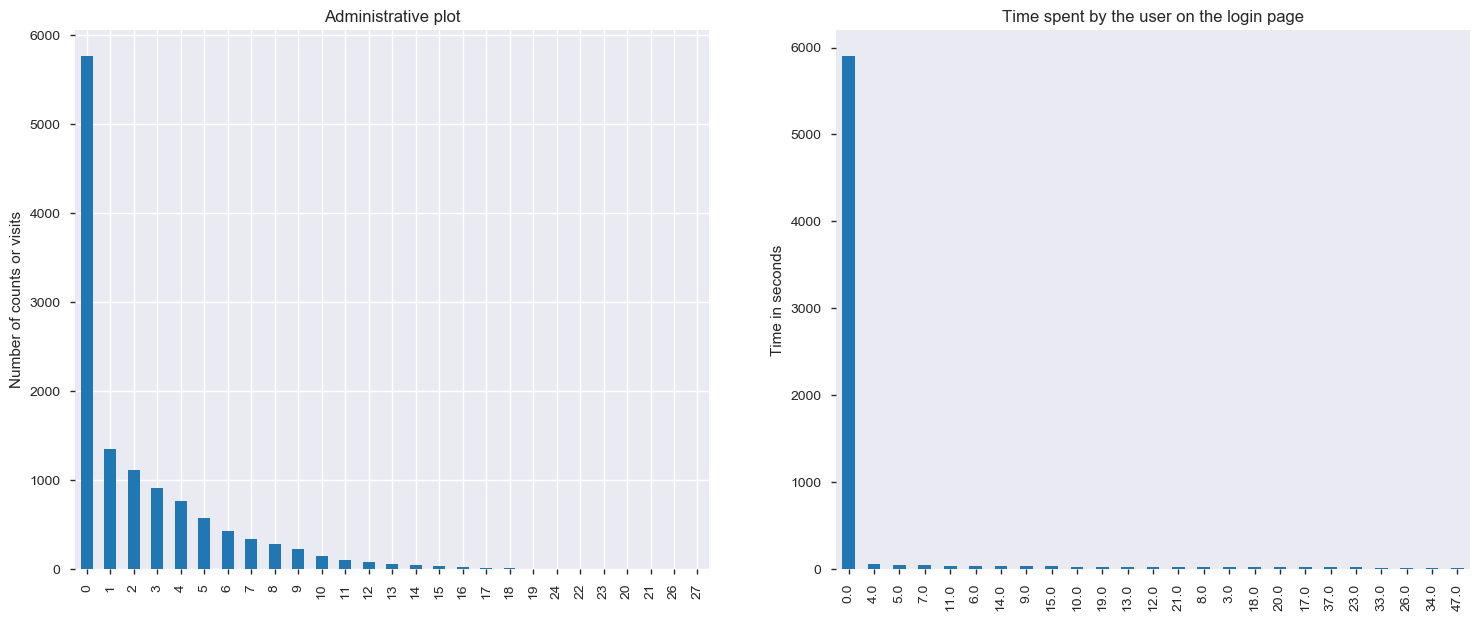

In [11]:
# User behavior on login pages

plt.rcParams['figure.figsize'] = (18, 7)

plt.subplot(1, 2, 1)
#Administrative visit count values
os_df["Administrative"].value_counts().plot.bar()
plt.title("Administrative plot")
plt.ylabel("Number of counts or visits")

plt.subplot(1, 2, 2)
#Administrative_Duration values
os_df["Administrative_Duration"].value_counts().head(25).plot.bar()
plt.grid()
plt.title("Time spent by the user on the login page")
plt.ylabel("Time in seconds")
plt.show()

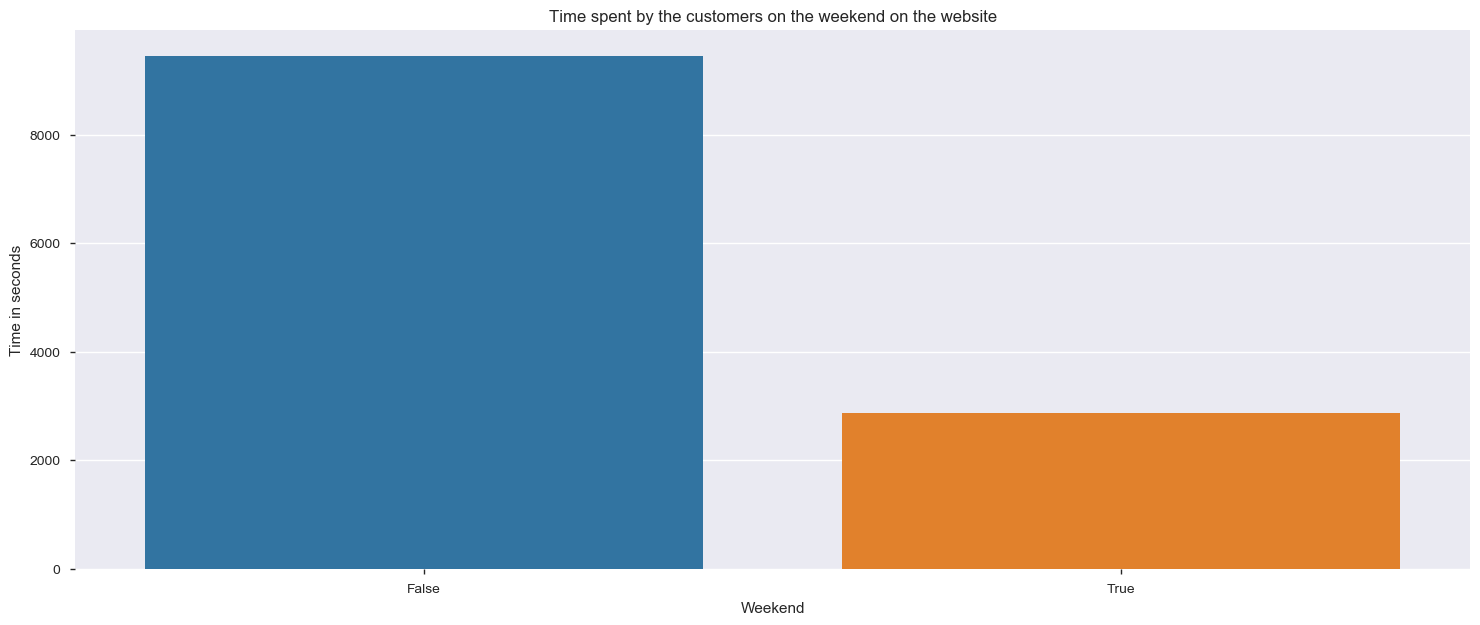

In [12]:
sns.countplot(x="Weekend",data=os_df)
plt.title("Time spent by the customers on the weekend on the website")
plt.ylabel("Time in seconds")
plt.show()

In [13]:
# Months mostly visited by online shoppers
os_df['Month'].value_counts()

May     3364
Nov     2998
Mar     1907
Dec     1727
Oct      549
Sep      448
Aug      433
Jul      432
June     288
Feb      184
Name: Month, dtype: int64

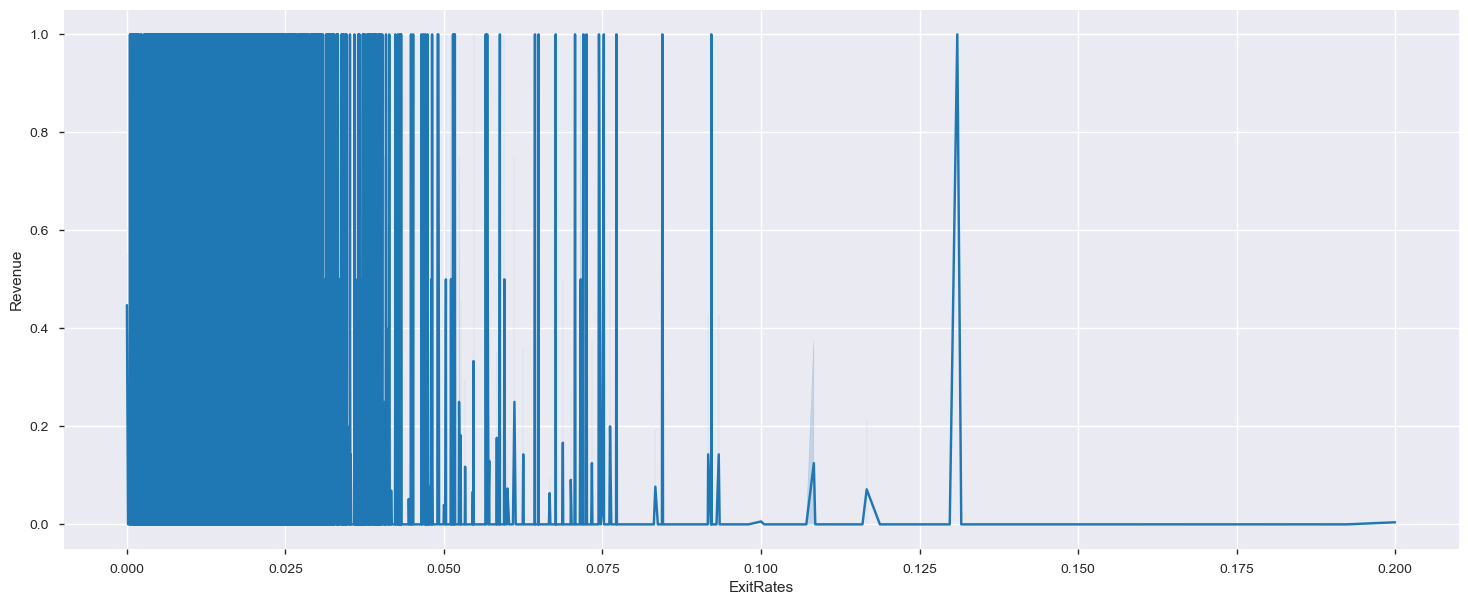

In [14]:
# Effect of Exit Rates on Revenue

sns.lineplot(x="ExitRates",y="Revenue",data=os_df)

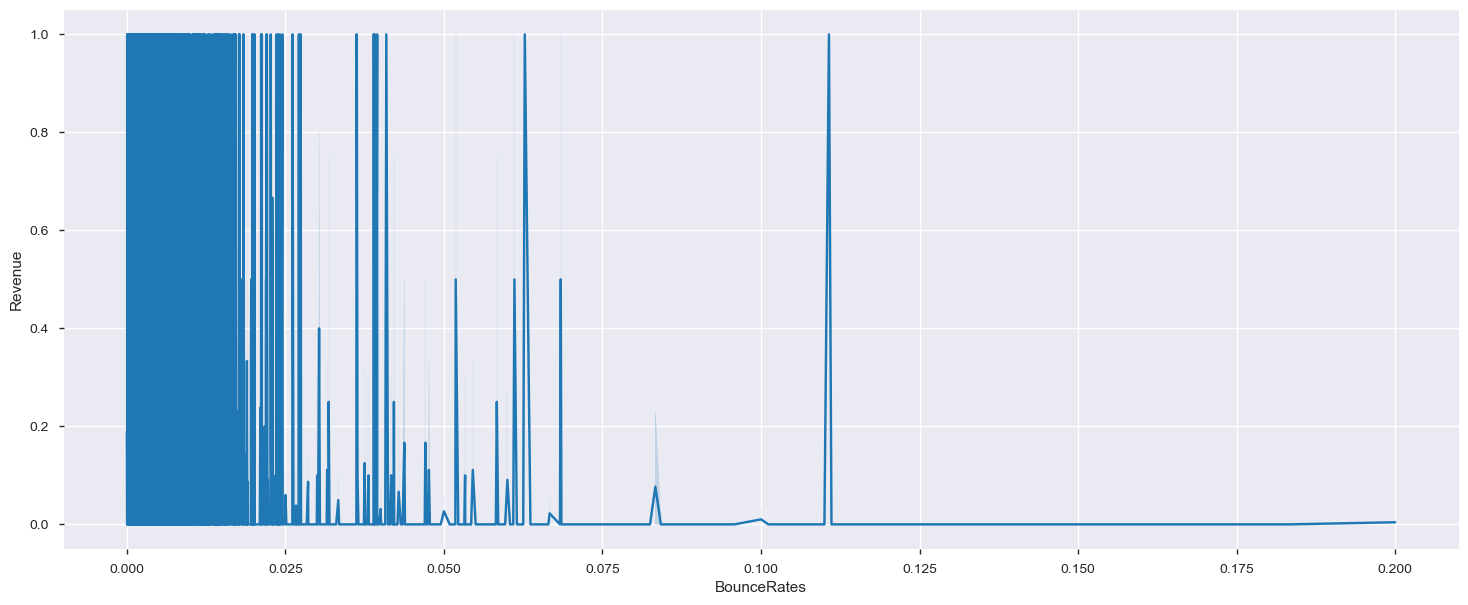

In [15]:
# Effect of Bounce Rates on Revenue

sns.lineplot(x="BounceRates",y="Revenue",data=os_df)

# Correlation Matrix

In [16]:
os_df.corr()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue
Administrative,1.000000,0.601583,0.376850,0.255848,0.431119,0.373939,-0.223563,-0.316483,0.098990,-0.094778,-0.006347,-0.025035,-0.005487,-0.033561,0.026417,0.138917
Administrative_Duration,0.601583,1.000000,0.302710,0.238031,0.289087,0.355422,-0.144170,-0.205798,0.067608,-0.073304,-0.007343,-0.015392,-0.005561,-0.014376,0.014990,0.093587
Informational,0.376850,0.302710,1.000000,0.618955,0.374164,0.387505,-0.116114,-0.163666,0.048632,-0.048219,-0.009527,-0.038235,-0.029169,-0.034491,0.035785,0.095200
Informational_Duration,0.255848,0.238031,0.618955,1.000000,0.280046,0.347364,-0.074067,-0.105276,0.030861,-0.030577,-0.009579,-0.019285,-0.027144,-0.024675,0.024078,0.070345
ProductRelated,0.431119,0.289087,0.374164,0.280046,1.000000,0.860927,-0.204578,-0.292526,0.056282,-0.023958,0.004290,-0.013146,-0.038122,-0.043064,0.016092,0.158538
ProductRelated_Duration,0.373939,0.355422,0.387505,0.347364,0.860927,1.000000,-0.184541,-0.251984,0.052823,-0.036380,0.002976,-0.007380,-0.033091,-0.036377,0.007311,0.152373
BounceRates,-0.223563,-0.144170,-0.116114,-0.074067,-0.204578,-0.184541,1.000000,0.913004,-0.119386,0.072702,0.023823,-0.015772,-0.006485,0.078286,-0.046514,-0.150673
ExitRates,-0.316483,-0.205798,-0.163666,-0.105276,-0.292526,-0.251984,0.913004,1.000000,-0.174498,0.102242,0.014567,-0.004442,-0.008907,0.078616,-0.062587,-0.207071
PageValues,0.098990,0.067608,0.048632,0.030861,0.056282,0.052823,-0.119386,-0.174498,1.000000,-0.063541,0.018508,0.045592,0.011315,0.012532,0.012002,0.492569
SpecialDay,-0.094778,-0.073304,-0.048219,-0.030577,-0.023958,-0.036380,0.072702,0.102242,-0.063541,1.000000,0.012652,0.003499,-0.016098,0.052301,-0.016767,-0.082305


Observations

Most of the visitors are not visiting the website on weekends

New visitors generate more revenue than new visitors and others

Most of the visitors spend no time on Administrative pages

May and November are the months of most hits by the online shoppers

Revenue is affected by Exit Rates and Bounce Rates

Page Values has direct correlation with Revenue

# Data Pre-processing

In [17]:
# one hot encoding 

os_df_onehot = pd.get_dummies(os_df)

os_df_onehot.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'Weekend',
       'Revenue', 'Month_Aug', 'Month_Dec', 'Month_Feb', 'Month_Jul',
       'Month_June', 'Month_Mar', 'Month_May', 'Month_Nov', 'Month_Oct',
       'Month_Sep', 'VisitorType_New_Visitor', 'VisitorType_Other',
       'VisitorType_Returning_Visitor'],
      dtype='object')

In [18]:
# label encoding of revenue

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
os_df['Revenue'] = le.fit_transform(os_df['Revenue'])
os_df['Revenue'].value_counts()

0    10422
1     1908
Name: Revenue, dtype: int64

In [19]:
# getting dependent and independent variables

x = os_df_onehot
# removing the target column revenue from x
x = x.drop(['Revenue'], axis = 1)

y = os_df['Revenue']

# checking the shapes
print("Shape of x:", x.shape)
print("Shape of y:", y.shape)

Shape of x: (12330, 28)
Shape of y: (12330,)


# Feature Importance

In [20]:
corr = os_df_onehot.corr() #let's take a look at pearson's correlation
corr['Revenue'].sort_values(ascending=False)

Revenue                          1.000000
PageValues                       0.492569
ProductRelated                   0.158538
Month_Nov                        0.154774
ProductRelated_Duration          0.152373
Administrative                   0.138917
VisitorType_New_Visitor          0.104136
Informational                    0.095200
Administrative_Duration          0.093587
Informational_Duration           0.070345
Month_Oct                        0.032666
Weekend                          0.029295
Browser                          0.023984
Month_Sep                        0.019983
Month_Aug                        0.010959
VisitorType_Other                0.007715
Month_Jul                       -0.001036
TrafficType                     -0.005113
Region                          -0.011595
OperatingSystems                -0.014668
Month_June                      -0.023112
Month_Dec                       -0.033112
Month_Feb                       -0.047114
Month_Mar                       -0

# Modelling

## Logistic Regression Model

In [21]:
X = os_df_onehot.drop('Revenue',axis=1)
y = os_df_onehot['Revenue']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)
# Feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
# Logistic Regression Model
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

Text(0.5, 621.5555555555555, 'Predicted label')

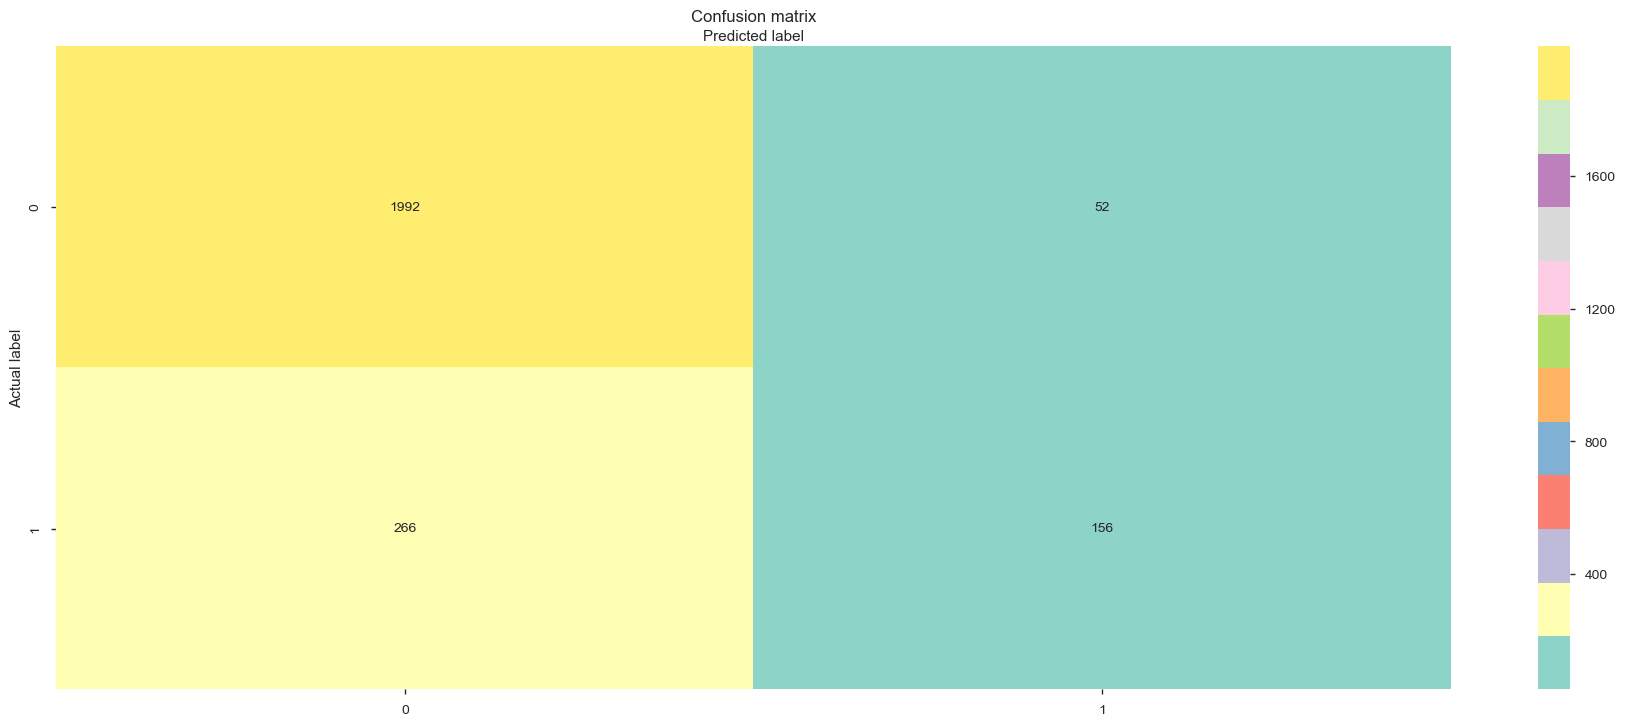

In [22]:
# predict values for the testing data

# Predicting the test set result
y_pred = classifier.predict(X_test)

# Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="Set3" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Hence we have 

Correct Predictions : 1992+156 = 2148

Incorrect Predictions: 52+266 = 318

In [23]:
# Create a classification report for the model

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

       False       0.88      0.97      0.93      2044
        True       0.75      0.37      0.50       422

    accuracy                           0.87      2466
   macro avg       0.82      0.67      0.71      2466
weighted avg       0.86      0.87      0.85      2466



In [24]:
from sklearn import metrics
print("Accuracy of Logistic Regression Model:",metrics.accuracy_score(y_test, y_pred))

Accuracy of Logistic Regression Model: 0.8710462287104623


## SVM and Decision Tree Models

In [25]:
# splitting the data

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

# checking the shapes

print("Shape of x_train :", x_train.shape)
print("Shape of y_train :", y_train.shape)
print("Shape of x_test :", x_test.shape)
print("Shape of y_test :", y_test.shape)

Shape of x_train : (8631, 28)
Shape of y_train : (8631,)
Shape of x_test : (3699, 28)
Shape of y_test : (3699,)


In [26]:
#########################################   SVM RBF Kernel  #############################################################
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf')
classifier.fit(x_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(x_test)

from sklearn.metrics import confusion_matrix
cm_test = confusion_matrix(y_pred, y_test)

y_pred_train = classifier.predict(x_train)
cm_train = confusion_matrix(y_pred_train, y_train)

print()
print('Accuracy for training set for SVM(RBF) = {}'.format((cm_train[0][0] + cm_train[1][1])/len(y_train)))
print('Accuracy for test set for SVM(RBF) = {}'.format((cm_test[0][0] + cm_test[1][1])/len(y_test)))


Accuracy for training set for SVM(RBF) = 0.9954814042405283
Accuracy for test set for SVM(RBF) = 0.8318464449851312


In [27]:
#########################################   Decision Tree  #############################################################
X = os_df_onehot.iloc[:, :-1].values
y = os_df_onehot.iloc[:, -1].values

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion='entropy',max_depth=5, min_samples_split= 100)
classifier.fit(x_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(x_test)

from sklearn.metrics import confusion_matrix
cm_test = confusion_matrix(y_pred, y_test)

y_pred_train = classifier.predict(x_train)
cm_train = confusion_matrix(y_pred_train, y_train)

print()
print('Accuracy for training set for Decision Tree = {}'.format((cm_train[0][0] + cm_train[1][1])/len(y_train)))
print('Accuracy for test set for Decision Tree = {}'.format((cm_test[0][0] + cm_test[1][1])/len(y_test)))


Accuracy for training set for Decision Tree = 1.0
Accuracy for test set for Decision Tree = 1.0


# Conclusion

Due to overfitting of DT we can simply say that SVM (RBF) can be used as a perfect model for such data set